In [1]:
%load_ext autoreload
%autoreload 2

%pip install -r ../../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
import sys
import pickle

# Se agrega el path para poder importar los modulos locales
if "../" not in sys.path:
    sys.path.append("../")

import pandas as pd

import xgboost as xg
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

import shap

/Users/luisangel/Documents/Datathon2024/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
X = pd.read_parquet("data/variables.parquet")
y = pd.read_parquet("../../resources/flights_clean.parquet")["Passengers"]

In [23]:
train_x, test_x, train_y, test_y = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
)

eval_set = [(test_x, test_y)]

train_dmatrix = xg.DMatrix(data=train_x, label=train_y)
test_dmatrix = xg.DMatrix(data=test_x, label=test_y)

# xgb_r = XGBRegressor(n_estimators=10, seed=123)
xgb_r = XGBRegressor(learning_rate=0.5, n_estimators=250, random_state=0)
xgb_r.fit(train_x, train_y, eval_set=eval_set, verbose=True)
y_pred = xgb_r.predict(test_x)

[0]	validation_0-rmse:32.18636
[1]	validation_0-rmse:30.49540
[2]	validation_0-rmse:29.68878
[3]	validation_0-rmse:29.17165
[4]	validation_0-rmse:28.74362
[5]	validation_0-rmse:28.47523
[6]	validation_0-rmse:28.11065
[7]	validation_0-rmse:27.85357
[8]	validation_0-rmse:27.65470
[9]	validation_0-rmse:27.47005
[10]	validation_0-rmse:27.36569
[11]	validation_0-rmse:27.24535
[12]	validation_0-rmse:27.17549
[13]	validation_0-rmse:27.04663
[14]	validation_0-rmse:26.92344
[15]	validation_0-rmse:26.82148
[16]	validation_0-rmse:26.78047
[17]	validation_0-rmse:26.70385
[18]	validation_0-rmse:26.58114
[19]	validation_0-rmse:26.49068
[20]	validation_0-rmse:26.37014
[21]	validation_0-rmse:26.30900
[22]	validation_0-rmse:26.23448
[23]	validation_0-rmse:26.18099
[24]	validation_0-rmse:26.16018
[25]	validation_0-rmse:26.08333
[26]	validation_0-rmse:26.04320
[27]	validation_0-rmse:25.99746
[28]	validation_0-rmse:25.95670
[29]	validation_0-rmse:25.91818
[30]	validation_0-rmse:25.88027
[31]	validation_0-

In [25]:
X.loc[X["aeronave_9h-swb"] == 1, "Capacity"].value_counts()

Capacity
178    76
180     2
Name: count, dtype: int64

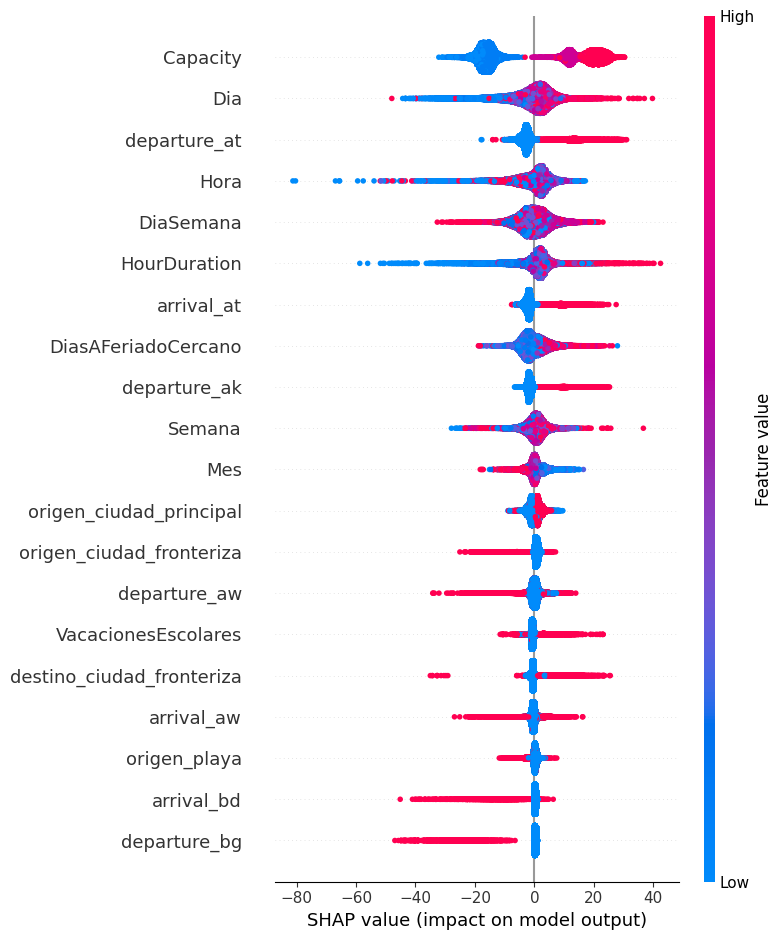

In [11]:
explainer = shap.TreeExplainer(xgb_r)
shap_values = explainer.shap_values(train_x)
shap.summary_plot(shap_values, train_x)

In [8]:
pickle.dump(xgb_r, open("models/xgb_pasajeros_model.pickle", "wb"))